<a href="https://colab.research.google.com/github/jtting22/ca04/blob/main/JTING_CA04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
import xgboost as xgb 
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [ ]:
#Mounting GoogleDrive in order to read the needed file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Source and Contents**

In [ ]:
#Putting in the Data from CA03
census_data = pd.read_csv('/content/drive/My Drive/Data Files/CA03/census_data.csv')

In [ ]:
census_data.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,31-40,Mi,Mid,> 0,High,13,Bachelors,income,36-4,train,0
1,0-30,High,High,= 0,High,13,Bachelors,income,40-55,train,0
2,31-40,Low,Mid,= 0,High,9-12,Mid,income,36-4,train,0
3,31-40,Low,High,= 0,Mid,0-8,Low,income,40-55,train,0
4,31-40,High,High,= 0,Low,13,Bachelors,income,26-3,train,0


In [ ]:
census_data.shape

(48842, 11)

In [ ]:
census_data.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [ ]:
#split the train and the test data for usage
split = census_data['flag'].unique()
print(split)

for value in split:
    train_data = census_data[census_data['flag']== 'train']
    test_data = census_data[census_data['flag']== 'test']

['train' 'test']


In [ ]:
#Grouping all of our categorical variables in the dataset
categorical = ['age_bin', 'capital_gl_bin', 'education_bin', 'hours_per_week_bin', 'msr_bin','race_sex_bin','occupation_bin']

In [ ]:
#Create Dummies for our Training and Test Data
y_test = test_data['y']

x_test = test_data[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']]

x_test = pd.get_dummies(x_test, columns=categorical, drop_first=True)

y_train = train_data['y']

x_train = train_data[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']]

x_train = pd.get_dummies(x_train, columns=categorical, drop_first=True)

# **Finding Optimal Value of a Key Hyper-Parameter**

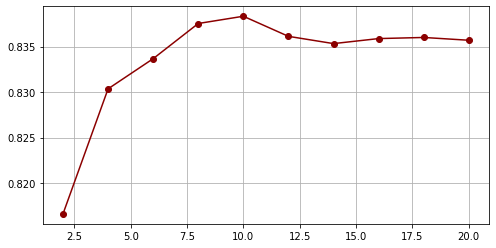

In [ ]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred',marker='o', grid=True)

In [ ]:
#From our graph we can see that the most optimal number is 10,.  After that point the decision tree begins to lower

# **Building a Random Forest Model**

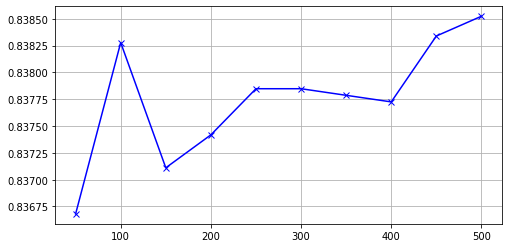

In [ ]:
results = []
max_depth_options = [50,100,150,200,250,300,350,400,450,500]
for trees in max_depth_options:
    model = RandomForestClassifier(n_estimators=trees, random_state=0)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='blue',marker='x', grid=True)

Our best decision tree in this model is 500.

# **Building AdaBoost, Gradient Boost (classifier) and XGB Model**

# Adaboost

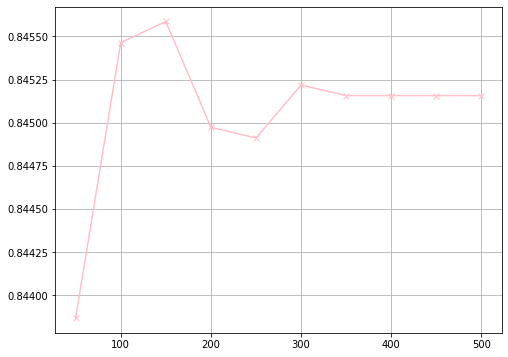

In [ ]:
accuracy_scores = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for items in n_estimator:
  admodel = AdaBoostClassifier(random_state =0, n_estimators = items)
  admodel.fit(x_train, y_train)
  y_pred = admodel.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  accuracy_scores.append(accuracy)

plt.figure(figsize=(8,6))
pd.Series(accuracy_scores, n_estimator).plot(color='pink', marker = 'x', grid=True)

# Gradient Boost

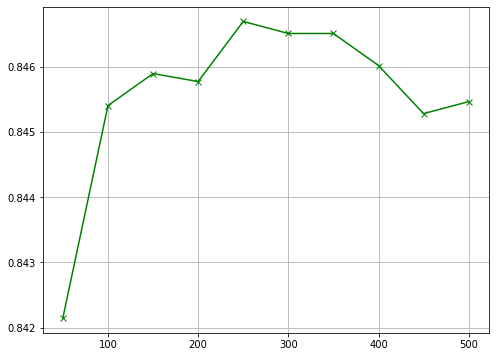

In [ ]:
accuracy_scores = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for items in n_estimator:
  gmodel = GradientBoostingClassifier(random_state =0, n_estimators = items)
  gmodel.fit(x_train, y_train)
  y_pred = gmodel.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  accuracy_scores.append(accuracy)

plt.figure(figsize=(8,6))
pd.Series(accuracy_scores, n_estimator).plot(color='green', marker = 'x', grid=True)

# XGB Model

In [ ]:
!pip install xgboost

In [ ]:
from sklearn import datasets
import xgboost as xgb

In [ ]:
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [ ]:
#revmoing commas and "<" in order to run xgb boost
x_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_train.columns.values]

In [ ]:
x_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_test.columns.values]

In [ ]:
census_data=census_data.replace(', ','<',regex=True).astype(str)

In [ ]:
x_test.head()

,age_bin_b. 26-30 & 71-100,age_bin_c. 31-35 & 61-70,age_bin_d. 36-40 & 56-60,age_bin_e. 40-55,capital_gl_bin_b. _ 0,capital_gl_bin_c. > 0,education_bin_b. Mid,education_bin_c. Bachelors,education_bin_d. Masters,education_bin_e. High,...,hours_per_week_bin_d. 41-50 & 61-70,hours_per_week_bin_e. 51-60,msr_bin_b. Mid,msr_bin_c. High,race_sex_bin_b. Mid,race_sex_bin_c. High,occupation_bin_b. Mid - Low,occupation_bin_c. Mid - Mid,occupation_bin_d. Mid - High,occupation_bin_e. High
32561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
32562,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,1,0,0,0
32563,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
32564,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
32565,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


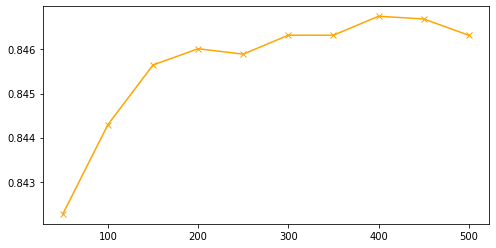

In [ ]:
accuracy_scores = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for values in n_estimator:
  xgb_model = XGBClassifier(n_estimators=values, random_state=0)
  xgb_model.fit(x_train, y_train)
  y_pred = xgb_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  accuracy_scores.append(accuracy)


plt.figure(figsize=(8,4))
pd.Series(accuracy_scores, n_estimator).plot(color='orange', marker = 'x')

# Compare Performance

In [ ]:
#Random Forest Model
forest = RandomForestClassifier(random_state = 0, n_estimators = 150)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
forest_accuracy = np.mean(y_test==y_pred)
forest_auc=roc_auc_score(y_test, y_pred)


In [ ]:
#AdaBoost Model
adaboost = AdaBoostClassifier(random_state =0, n_estimators = 150)
adaboost.fit(x_train, y_train)
y_pred = adaboost.predict(x_test)
adaboost_acc = np.mean(y_test==y_pred)
adaboost_auc=roc_auc_score(y_test, y_pred)


In [ ]:
#Gradient Boost
gboost = GradientBoostingClassifier(random_state =0, n_estimators = 150)
gboost.fit(x_train, y_train)
y_pred = gboost.predict(x_test)
gboost_accuracy = np.mean(y_test==y_pred)
gboost_auc=roc_auc_score(y_test, y_pred)

In [ ]:
#XGB Boost
xgb = XGBClassifier(random_state=0, n_estimators=150)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
xgb_accuracy = np.mean(y_test==y_pred)
xgb_auc=roc_auc_score(y_test, y_pred)

In [ ]:
df = pd.DataFrame({'Random Forest': [forest_accuracy, forest_auc, 150, 0],
                   'AdaBoost': [adaboost_acc, adaboost_auc, 150, 0],
                   'Gradient Boost': [gboost_accuracy, gboost_auc, 150, 0],
                   'XGB': [xgb_accuracy, xgb_auc, 150, 0]},
                  index=['Accuracy', 'AUC', 'n_estimators', 'random_state'])

In [ ]:
df.head()
#Values look messy with too many decimals so we will round to 3 decimal places

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.837111,0.845587,0.845894,0.845648
AUC,0.743675,0.744824,0.755172,0.751599
n_estimators,150.000000,150.000000,150.000000,150.000000
random_state,0.000000,0.000000,0.000000,0.000000


In [ ]:
df = round(df,3)

In [ ]:
df.head()

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.837,0.846,0.846,0.846
AUC,0.744,0.745,0.755,0.752
n_estimators,150.000,150.000,150.000,150.000
random_state,0.000,0.000,0.000,0.000
